# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df = data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']
print(male_df.describe())
print(female_df.describe())

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [5]:
data = pd.read_csv('weight-height.csv')
male_df = data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']

print('Male Height mean:', male_df.Height.mean())# Male Height mean: 69.02634590621737
print('Male Height sd:', male_df.Height.std())# Male Height sd: 2.8633622286606517
print('Male Weight mean:', male_df.Weight.mean())# Male Weight mean: 187.0206206581929
print('Male Weight sd:', male_df.Weight.std())# Male Weight sd: 19.781154516763813
print('Female Height mean:', female_df.Height.mean())# Female Height mean: 63.708773603424916
print('Female Height sd:', female_df.Height.std())# Female Height sd: 2.696284015765056
print('Female Weight mean:', female_df.Weight.mean())# Female Weight mean: 135.8600930074687
print('Female Weight sd:', female_df.Weight.std())# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

Text(0.5, 1.0, 'Students Height Distribution')

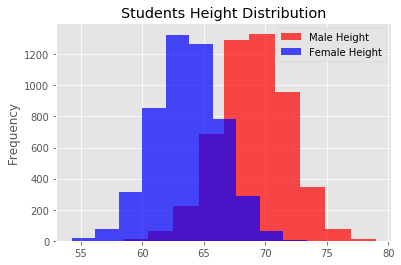

In [10]:
# Your code here
male_df.Height.hist(label='Male Height', color='Red', bins=10, alpha=0.7, density = True)
female_df.Height.hist(label='Female Height', color='Blue',  bins= 10, alpha=0.7, density = True)
plt.ylabel('Frequency')
plt.legend()
plt.title('Students Height Distribution')

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

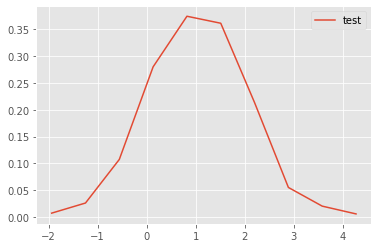

In [56]:
xbins=10
def density(x):
    n, bins = np.histogram(x,bins=xbins, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = (bins[k] + bins[k+1])*0.5
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 1, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
x,y= density(s)
x, y
plt.plot(x,y, label = 'test')
# y.hist(label='Male Height', color='Red', bins=10, alpha=0.5)
plt.legend()
# plt.xticks(x)

## Add overlapping density plots to the histograms plotted earlier

Text(0.5, 1.0, 'Students Height Distribution')

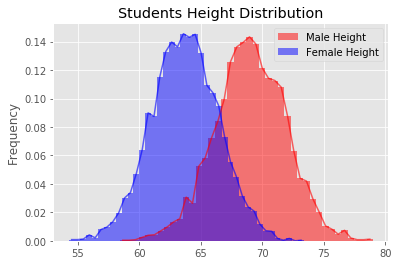

In [68]:
# Your code here 
xbins = 40
male_x, male_y = density(male_df.Height)
male_df.Height.hist(label='Male Height', color='Red', bins= xbins, alpha=0.5, density=1)
plt.plot(male_x, male_y, color='Red', alpha = 0.6)

female_x, female_y = density(female_df.Height)
female_df.Height.hist(label='Female Height', color='Blue',  bins= xbins, alpha=0.5, density=1)
plt.plot(female_x, female_y, color='Blue', alpha = 0.6)
plt.ylabel('Frequency')
plt.legend()
plt.title('Students Height Distribution')

## Repeat the above exercise for male and female weights

Text(0.5, 1.0, 'Students Weight Distribution')

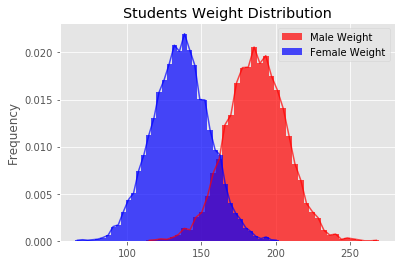

In [69]:
# Your code here 
male_df.Weight.hist(label='Male Weight', color='Red', bins=xbins, alpha=0.7, density = True)

male_x, male_y = density(male_df.Weight)
plt.plot(male_x, male_y, color='Red', alpha = 0.7)

female_df.Weight.hist(label='Female Weight', color='Blue',  bins=xbins, alpha=0.7, density = True)

female_x, female_y = density(female_df.Weight)
plt.plot(female_x, female_y, color='Blue', alpha = 0.7)

plt.ylabel('Frequency')
plt.legend()
plt.title('Students Weight Distribution')

## Write your observations in the cell below

### Record your observations - are these inline with your personal observations?
    There is an overlap in both weight and height for men and women. 
    Men height has a more spread, ie. more variable
    Expected men height is arround 67-71cm compared to women's 62-66cms. 
    Expected men weight is arround 170-210lbs compared to women's 120-145lbs. 
    Men and women height overlaps arround 64-67cms

### What is the takeaway when comparing male and female heights and weights?
    Weight will be a better factor to distinguish between male and female

## Repeat the above experiments in seaborn and compare with your results

In [50]:
# Code for heights here
import seaborn as sns

Text(0.5, 1.0, 'Height Distribution')

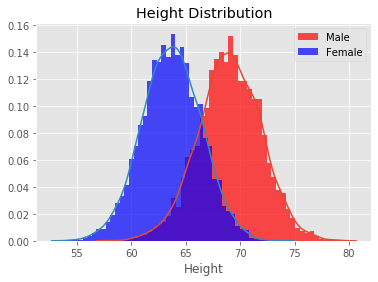

In [59]:
sns.distplot(male_df.Height, hist_kws= {'color': 'red',
                                        'alpha': 0.7,
                                        'label': 'Male'})
sns.distplot(female_df.Height, hist_kws= {'color': 'blue',
                                          'alpha': 0.7,
                                          'label': 'Female'})
plt.legend()
plt.title('Height Distribution')


Text(0.5, 1.0, 'Weight Distribution')

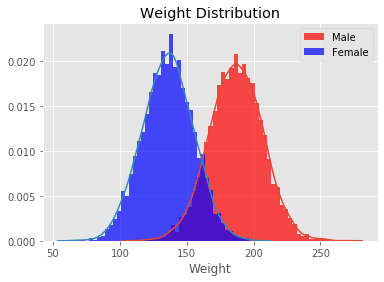

In [60]:
# Code for weights here
sns.distplot(male_df.Weight, hist_kws= {'color': 'red',
                                        'alpha': 0.7,
                                        'label': 'Male'})
sns.distplot(female_df.Weight, hist_kws= {'color': 'blue',
                                          'alpha': 0.7,
                                          'label': 'Female'})
plt.legend()
plt.title('Weight Distribution')

### Your comments on the two approaches here. 
Using matplotlib and np.histogram method was granular and takes longer. 
SNS plotting was much simpler. It adds a layer of abstraction. 
The Kernel density estimation is much smoother for SNS ploting

### are they similar? what makes them different if they are?
They are similar for the histogram which can be replicated. However, the KDE line is smotherand better fit

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.